In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/avinashkumarchaurasia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading JSON file

In [2]:
Data=pd.read_json('data.json')

In [3]:
Data

,topic,category,pro_arguments,con_arguments
0,Kirk will always be better than Picard!,TV,[{'Sex & The Motion Picture': 'Redshirtsalwa...,[{'Buy Adderall Online': 'Buy Adderall Online ...
1,Is LGBTQ+ wrong?,Society,[{'LGBTQ+ is Homosexuality and the Bible says ...,[{'No being LGBTQIA+ is not wrong': 'Lets divi...
2,Do you agree with the Derek Chauvin guilty v...,Politics,[{'Mauvin murdered Floyd.': 'If you punch an o...,[{'No. The decision was made under threat of r...
3,We should Institute a death penalty for homoph...,Politics,[{'I hate gays': 'The homosexual and it’s cons...,[{'A death penalty can only be justified if th...
4,Do you agree with the Black Lives Matter Movem...,Society,[{'BLM or if not you are racist.': 'Isuport it...,"[{'All Normal Human Lives Matter, That include..."


In [4]:
Data['Total arguments Per Token']=""
#Data.loc[0,'topic']

## Adding column for length of arguments(as per tokens)

In [5]:
list1=[]
new_list=[]
#a=list(Data['pro_arguments'][4][0].values())[4]
#index=0

Pro_list=Data['pro_arguments'].tolist()
con_list=Data['con_arguments'].tolist()

for Pro_argument,Con_argument in zip(Pro_list,con_list):
    Pro_new=list(Pro_argument[0].values())
    Pro_list=[len(nltk.word_tokenize(x)) for x in Pro_new]
    
    
    Con_new=list(Con_argument[0].values())
    Con_list=[len(nltk.word_tokenize(x)) for x in Con_new]
    New_list=Pro_list+Con_list
    
    #print(type(New_list))
    #Data.loc[index,'Total arguments']=nNew_list
    list1.append(New_list)
    #display(Pro_argument)
    
#New_list=[len(nltk.word_tokenize(x)) for x in list1]
#display(New_list)
Data['Total arguments Per Token']=list1
#Data['Total arguments'][3]


#Data

#print(list1[9])
#list1
#lis
#p=list(lis[4][0].values())
#[len(c) for c in p]
#display(list(lis[4][0].values())[1])
#list(lis[4][0].values())[1].split()

#for i in list1:
#X=np.array(Data['Total arguments Per Token'])
#X
#plt.hist(X)

In [6]:
Data

,topic,category,pro_arguments,con_arguments,Total arguments Per Token
0,Kirk will always be better than Picard!,TV,[{'Sex & The Motion Picture': 'Redshirtsalwa...,[{'Buy Adderall Online': 'Buy Adderall Online ...,"[446, 524, 527, 430, 326, 527, 368, 578, 480, ..."
1,Is LGBTQ+ wrong?,Society,[{'LGBTQ+ is Homosexuality and the Bible says ...,[{'No being LGBTQIA+ is not wrong': 'Lets divi...,"[82, 76, 268, 121, 86, 480, 195, 101, 119, 141..."
2,Do you agree with the Derek Chauvin guilty v...,Politics,[{'Mauvin murdered Floyd.': 'If you punch an o...,[{'No. The decision was made under threat of r...,"[109, 79, 63, 0, 65, 89, 199, 0]"
3,We should Institute a death penalty for homoph...,Politics,[{'I hate gays': 'The homosexual and it’s cons...,[{'A death penalty can only be justified if th...,"[74, 74, 66, 100, 72, 120, 67, 58, 53, 50, 0, ..."
4,Do you agree with the Black Lives Matter Movem...,Society,[{'BLM or if not you are racist.': 'Isuport it...,"[{'All Normal Human Lives Matter, That include...","[61, 326, 97, 102, 447, 138, 145, 65, 61, 89, ..."


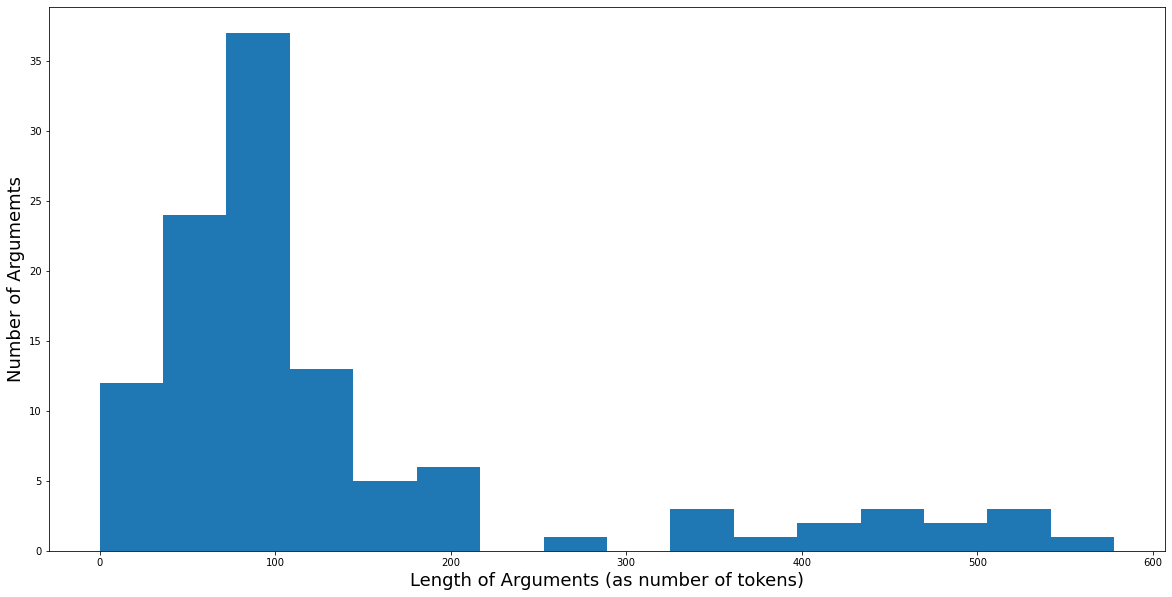

In [7]:
Argument_list=[]
new_list=[]
#Argument_list=Data['Total arguments Per Token'][0]
#Argument_list2=Data['Total arguments Per To
index=Data['Total arguments Per Token'].index
index
for i in range(len(index)):
    Argument_list=Data['Total arguments Per Token'][i]
    New_list=New_list+Argument_list
#max(New_list)


fig=plt.figure(figsize=(20,10))
plt.hist(New_list,bins=16)

plt.xlabel('Length of Arguments (as number of tokens)',fontsize=18)
plt.ylabel('Number of Argumemts',fontsize=18)

plt.show()

In [8]:
a="".join(Data['pro_arguments'][4][0].values())

## Adding columns for Number of Pro, Con and Total arguments for each topic

In [9]:
Data['pro_arguments'][4][0].keys()

dict_keys(['BLM or if not you are racist.', 'Only the stupid could disagree', 'I support the Black Lives Matter movement.', 'Of course Black Lives Matter', "If you don't you are racist or ignorant.", 'Black Lives Matter', 'Black lives matter.', "Obviously. Why wouldn't they.", 'Of course black lives matter', 'Black Lives Do Matter.', 'null'])

In [10]:
len(Data['pro_arguments'][4][0].keys())-1

10

In [11]:
Data['Number of Pro Argummets']=Data['pro_arguments'].apply(lambda x:len(x[0].values())-1)

In [12]:
Data['Number of Pro Argummets']

0    10
1    10
2     3
3    10
4    10
Name: Number of Pro Argummets, dtype: int64

In [13]:
Data['Number of Con Argummets']=Data['con_arguments'].apply(lambda x:len(x[0].values())-1)

In [14]:
Data['Number of Con Argummets']

0     5
1    10
2     3
3    10
4    10
Name: Number of Con Argummets, dtype: int64

In [15]:
Data

,topic,category,pro_arguments,con_arguments,Total arguments Per Token,Number of Pro Argummets,Number of Con Argummets
0,Kirk will always be better than Picard!,TV,[{'Sex & The Motion Picture': 'Redshirtsalwa...,[{'Buy Adderall Online': 'Buy Adderall Online ...,"[446, 524, 527, 430, 326, 527, 368, 578, 480, ...",10,5
1,Is LGBTQ+ wrong?,Society,[{'LGBTQ+ is Homosexuality and the Bible says ...,[{'No being LGBTQIA+ is not wrong': 'Lets divi...,"[82, 76, 268, 121, 86, 480, 195, 101, 119, 141...",10,10
2,Do you agree with the Derek Chauvin guilty v...,Politics,[{'Mauvin murdered Floyd.': 'If you punch an o...,[{'No. The decision was made under threat of r...,"[109, 79, 63, 0, 65, 89, 199, 0]",3,3
3,We should Institute a death penalty for homoph...,Politics,[{'I hate gays': 'The homosexual and it’s cons...,[{'A death penalty can only be justified if th...,"[74, 74, 66, 100, 72, 120, 67, 58, 53, 50, 0, ...",10,10
4,Do you agree with the Black Lives Matter Movem...,Society,[{'BLM or if not you are racist.': 'Isuport it...,"[{'All Normal Human Lives Matter, That include...","[61, 326, 97, 102, 447, 138, 145, 65, 61, 89, ...",10,10


In [16]:
Data['Total Arguments']=Data['Number of Pro Argummets']+Data['Number of Con Argummets']
Data

,topic,category,pro_arguments,con_arguments,Total arguments Per Token,Number of Pro Argummets,Number of Con Argummets,Total Arguments
0,Kirk will always be better than Picard!,TV,[{'Sex & The Motion Picture': 'Redshirtsalwa...,[{'Buy Adderall Online': 'Buy Adderall Online ...,"[446, 524, 527, 430, 326, 527, 368, 578, 480, ...",10,5,15
1,Is LGBTQ+ wrong?,Society,[{'LGBTQ+ is Homosexuality and the Bible says ...,[{'No being LGBTQIA+ is not wrong': 'Lets divi...,"[82, 76, 268, 121, 86, 480, 195, 101, 119, 141...",10,10,20
2,Do you agree with the Derek Chauvin guilty v...,Politics,[{'Mauvin murdered Floyd.': 'If you punch an o...,[{'No. The decision was made under threat of r...,"[109, 79, 63, 0, 65, 89, 199, 0]",3,3,6
3,We should Institute a death penalty for homoph...,Politics,[{'I hate gays': 'The homosexual and it’s cons...,[{'A death penalty can only be justified if th...,"[74, 74, 66, 100, 72, 120, 67, 58, 53, 50, 0, ...",10,10,20
4,Do you agree with the Black Lives Matter Movem...,Society,[{'BLM or if not you are racist.': 'Isuport it...,"[{'All Normal Human Lives Matter, That include...","[61, 326, 97, 102, 447, 138, 145, 65, 61, 89, ...",10,10,20


## Making dataframe for Number of Arguments per category

In [17]:
grouped_Data=Data.groupby("category")['Total Arguments'].sum()

In [18]:
grouped_Data

category
Politics    26
Society     40
TV          15
Name: Total Arguments, dtype: int64

## Plotting length of arguments per category

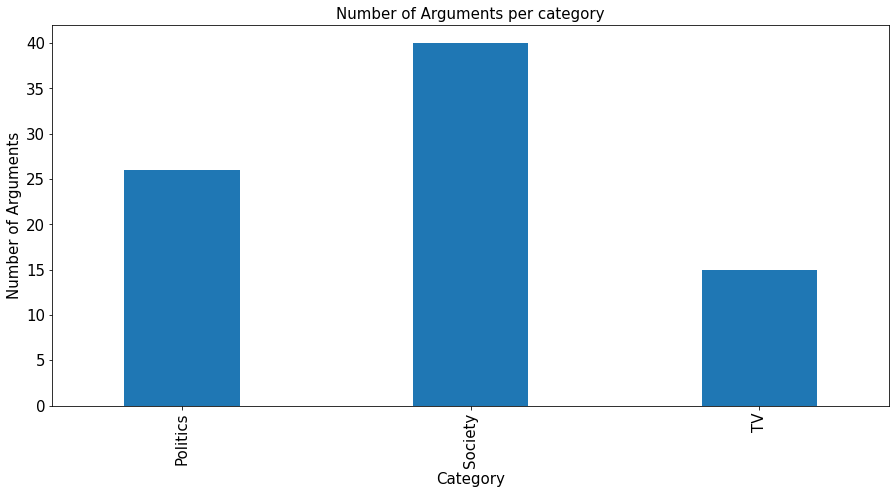

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
bp = Data.groupby('category')['Total Arguments'].sum().plot(kind='bar', ax=ax,width=0.40,fontsize=15)
ax.set_title('Number of Arguments per category',fontsize=15)
ax.set_ylabel('Number of Arguments',fontsize=15)
ax.set_xlabel("Category",fontsize=15)
plt.show()

## Plotting Bar graph for Length of Arguments per topic

In [20]:
X=list(Data['topic'])

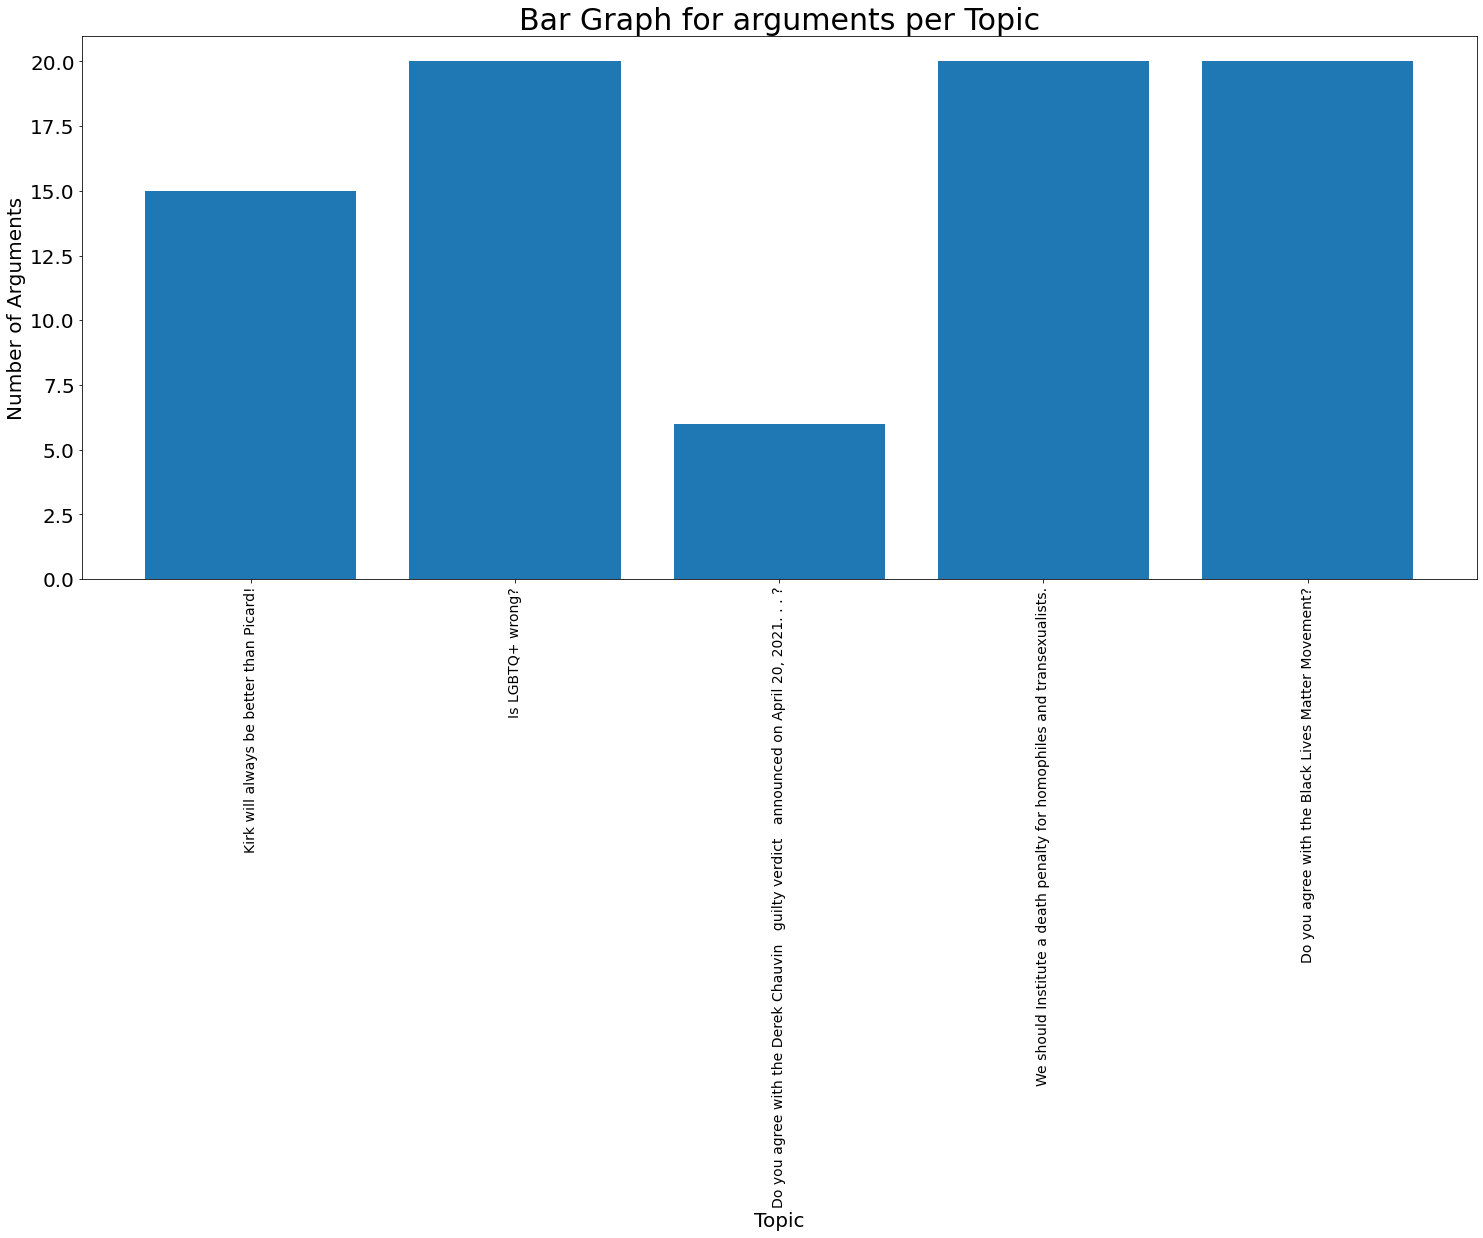

In [21]:
from matplotlib import ticker
fig = plt.figure(figsize = (25,10))

plt.bar(X,Data['Total Arguments'])

plt.xlabel('Topic',fontsize=20)
plt.ylabel('Number of Arguments',fontsize=20)
plt.title('Bar Graph for arguments per Topic',fontsize=30)

plt.xticks([i for i in range(5)],Data['topic'].tolist(),rotation=90,fontsize=14)
plt.yticks(fontsize=20)
#plt.legend(['T'],fontsize=20,loc='best')
plt.show()

In [22]:
#name="avinash, nash, chaurasia, sdsa;, bkjasxbas (avi)"

In [23]:
#tokens=nltk.wordpunct_tokenize(name)
#tokens

In [24]:
#nltk.download('punkt')
#from nltk.tokenize import word_tokenize
#tokens=(name)

In [25]:
#fig = plt.figure(figsize = (40, 20))
#plt.bar(Data['topic'],Data['Number of Con Argummets'],width=0.4)
#plt.xlabel('Topic')
#plt.ylabel('Number of Con-Arguments')
#plt.title('Bar Graph for Con-arguments per Topic')
#plt.ax
#plt.xticks(Data['topic'],fontsize=15)
#plt.tight_layout()
#plt.show()